<a href="https://colab.research.google.com/github/Arshbhatia23/Python-ML-Projects/blob/main/University_Admission_Analysis_And_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
df = files.upload()           

Saving Admissions.csv to Admissions.csv


In [2]:
# Importing the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading data
df = pd.read_csv('Admissions.csv')
print(df.head())
print()
print(df.columns)
df.drop('Serial No.',axis=1,inplace=True)
print()
print(df)

   Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit
0           1        337          118  ...  9.65         1             0.92
1           2        324          107  ...  8.87         1             0.76
2           3        316          104  ...  8.00         1             0.72
3           4        322          110  ...  8.67         1             0.80
4           5        314          103  ...  8.21         0             0.65

[5 rows x 9 columns]

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

      GRE Score  TOEFL Score  ...  Research  Chance of Admit
0           337          118  ...         1             0.92
1           324          107  ...         1             0.76
2           316          104  ...         1             0.72
3           322          110  ...         1             0.80
4           314          103  ...         0             0.65


In [4]:

df_university=df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [5]:
df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          2500 non-null   int64  
 1   TOEFL Score        2500 non-null   int64  
 2   University Rating  2500 non-null   int64  
 3   SOP                2500 non-null   float64
 4   LOR                2500 non-null   float64
 5   CGPA               2500 non-null   float64
 6   Research           2500 non-null   int64  
 7   Chance of Admit    2500 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 156.4 KB


In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,316.472000,107.192000,3.114000,3.37400,3.484000,8.576440,0.560000,0.721740
std,11.286105,6.076998,1.142596,0.99021,0.924709,0.604329,0.496486,0.141027
min,290.000000,92.000000,1.000000,1.00000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.50000,3.000000,8.127500,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.50000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.00000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.00000,5.000000,9.920000,1.000000,0.970000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:434: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3769f6c5f8>,
      dtype=object)

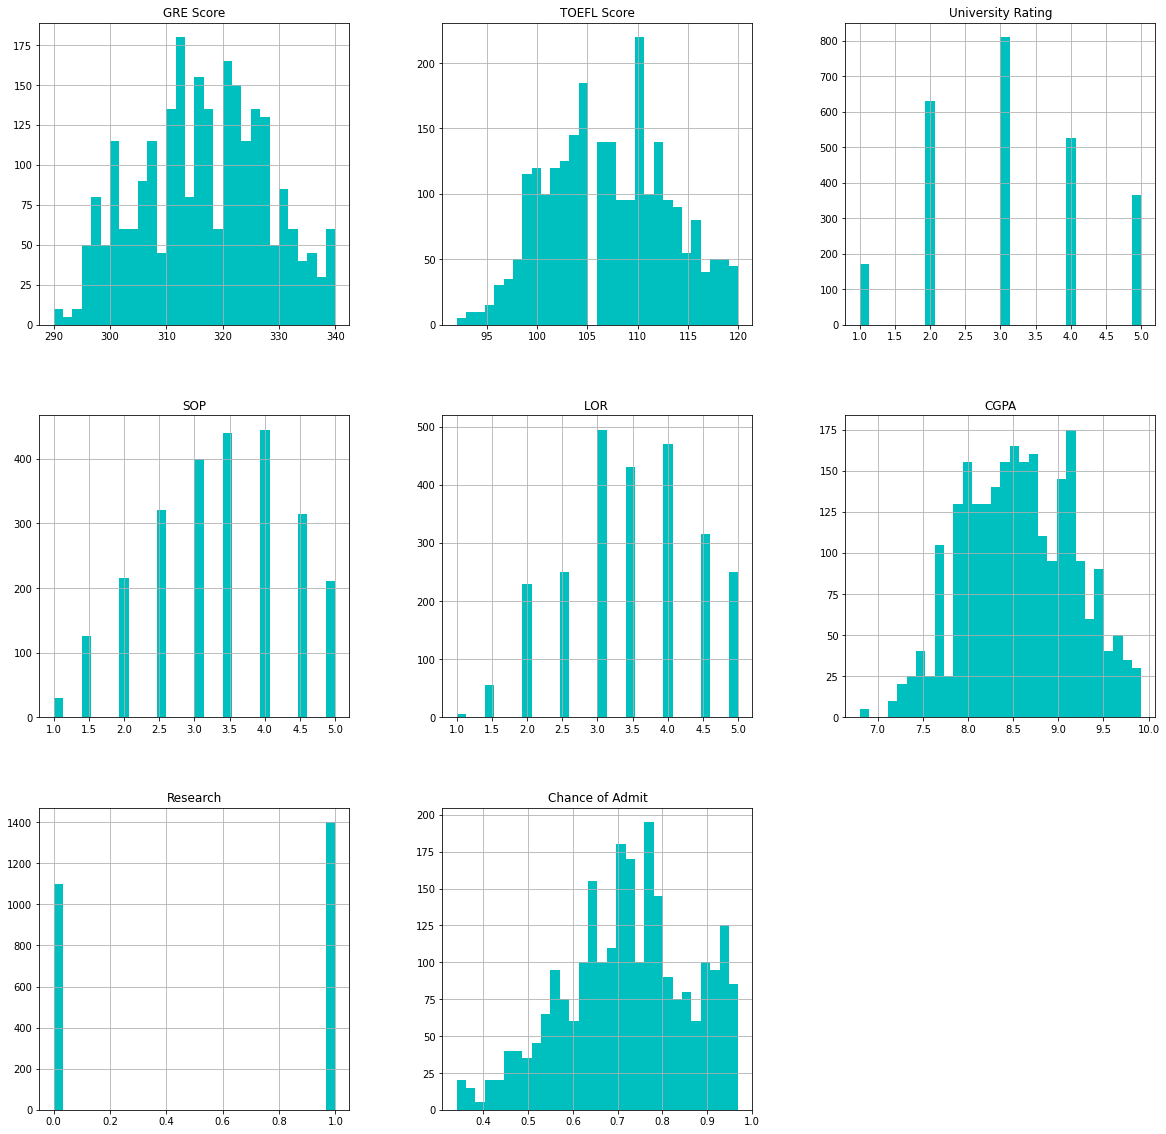

In [9]:
df.hist(bins=30,figsize=(20,20),color='C')

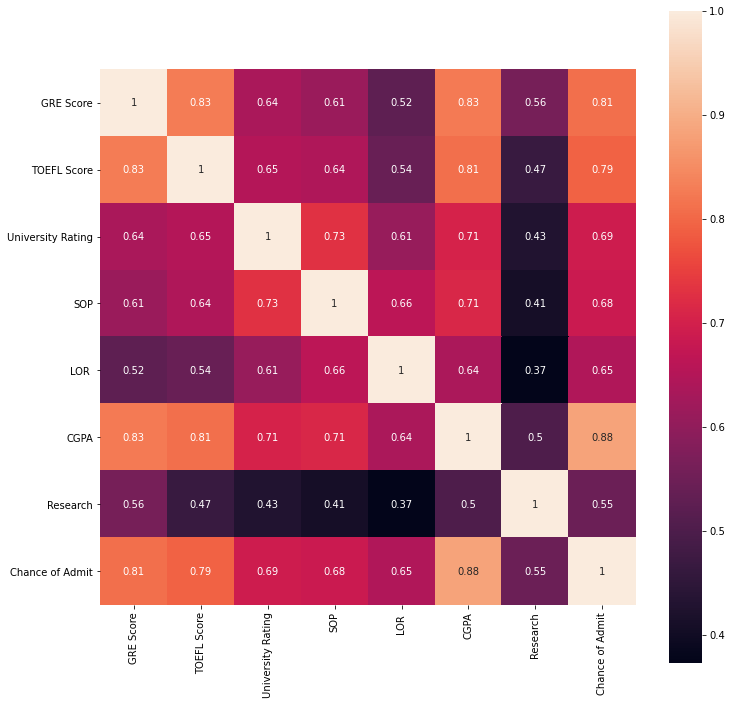

In [10]:
corr_matrix=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,square = True)
plt.show()

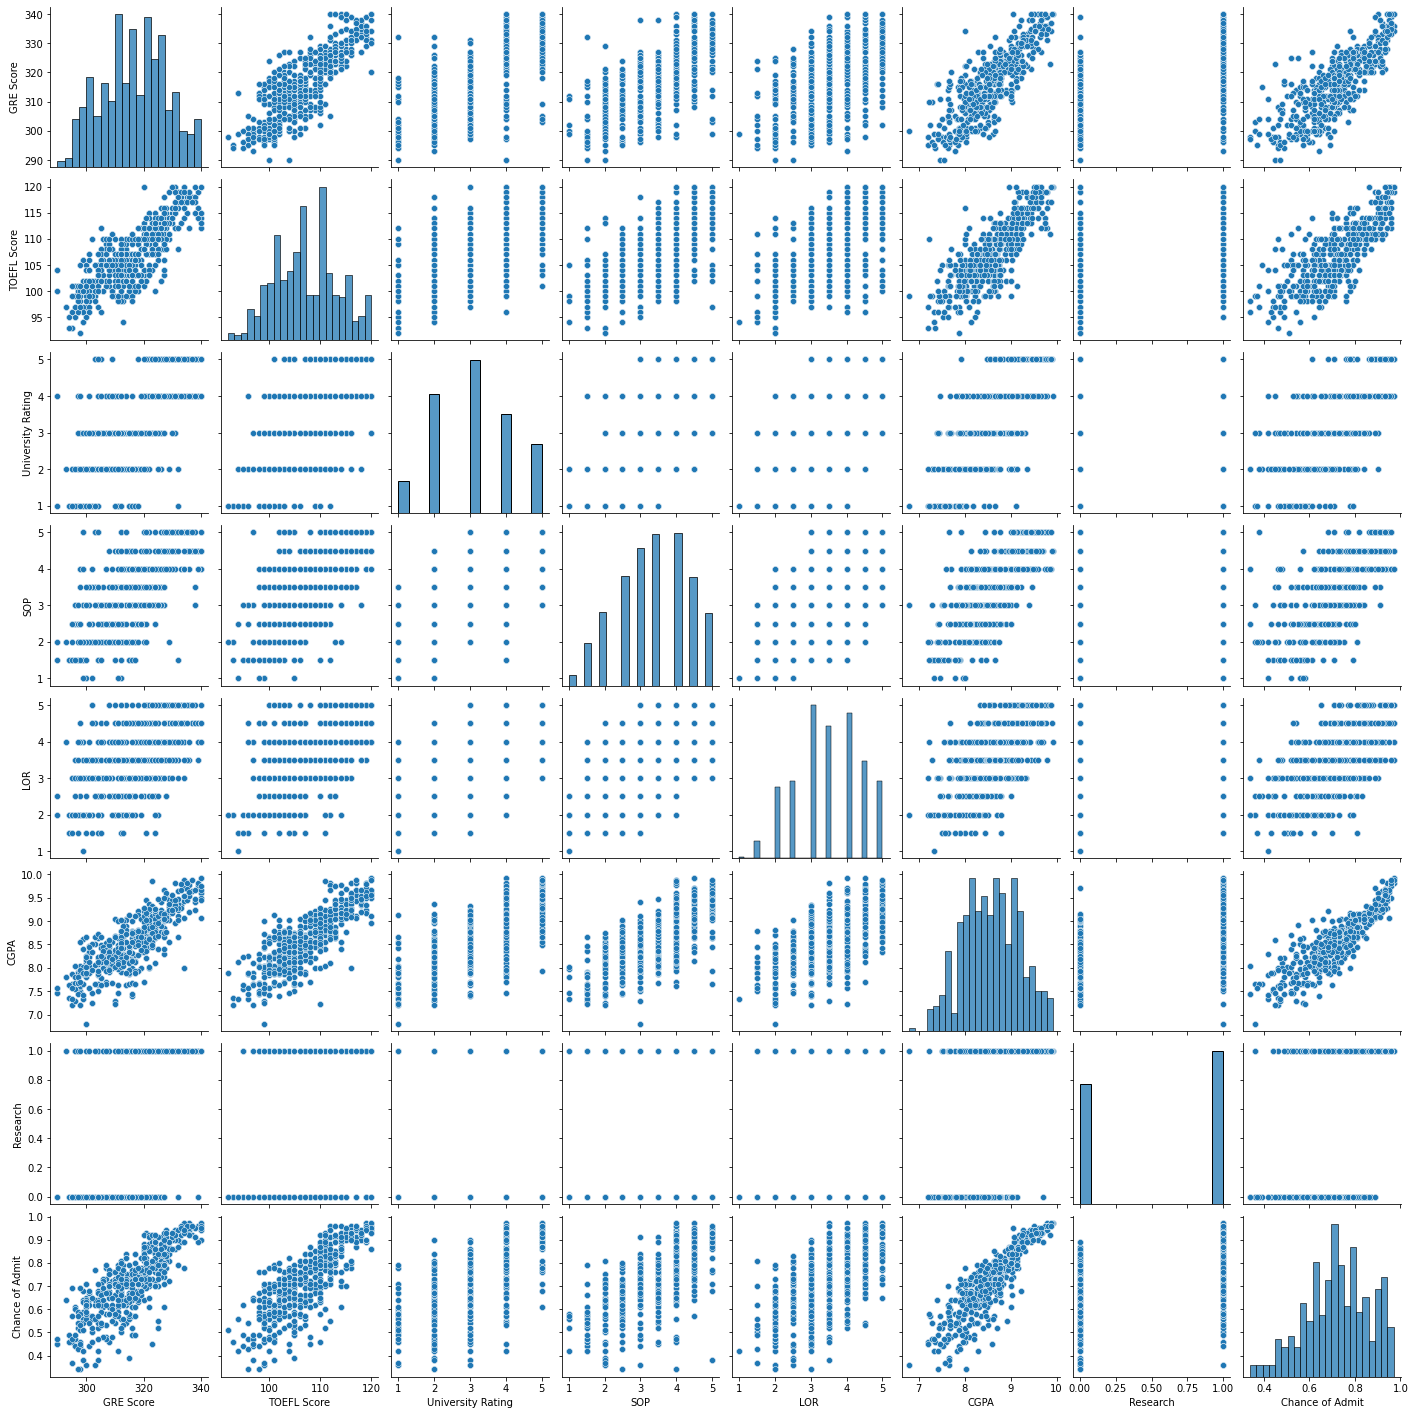

In [11]:
sns.pairplot(df)

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X=df.drop(columns=['Chance of Admit'])
y=df['Chance of Admit']
X.shape

(2500, 7)

In [14]:
y.shape

(2500,)

In [15]:
y

0       0.92
1       0.76
2       0.72
3       0.80
4       0.65
        ... 
2495    0.87
2496    0.96
2497    0.93
2498    0.73
2499    0.84
Name: Chance of Admit, Length: 2500, dtype: float64

In [16]:
X=np.array(X)
y=np.array(y)
#X

In [17]:
# y
y=y.reshape(-1,1)
y.shape

(2500, 1)

In [18]:
#scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

In [19]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,f1_score, recall_score, precision_score, matthews_corrcoef

In [22]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8189024349068916

In [24]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
accuracy_DecisionTree=DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree

1.0

In [26]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
accuracy_RandomForest=RandomForest_model.score(X_test,y_test)
accuracy_RandomForest

0.9828656845864016